In [1]:
import sys
if 'brainmontage' not in sys.modules:
  !pip install git+https://github.com/kjamison/brainmontageplot.git

import numpy as np
from brainmontage import create_montage_figure, save_image
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

  Cloning https://github.com/kjamison/brainmontageplot.git to /tmp/pip-req-build-4sjpms1_
  Running command git clone --filter=blob:none --quiet https://github.com/kjamison/brainmontageplot.git /tmp/pip-req-build-4sjpms1_
  Resolved https://github.com/kjamison/brainmontageplot.git to commit 3a68738a68176a645eb7cb160a7d7bace33b96a5
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 27.3 MB/s eta 0:00:00
  Created wheel for brainmontage: filename=brainmontage-1.4.2-py3-none-any.whl size=74846837 sha256=b36bf7ef4fe34440937f43e5a76031a1fa9cbba1b00c41fbc88ed540ca41bf5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-jevi0jav/wheels/15/a9/28/03ac300ce425f7c037383e109ccec20bb1266d0f2a34174898
Successfully built brainmontage


Importamos nuestros datos, dónde solo tendremos 2 clústeres ya que el líquido cefalorraquídeo no se puede visualizar

In [2]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("df_union_APOE4.csv")

# Mostrar las primeras filas
display(df)

,feature,0,id,Cluster
0,ST101SV,101,14,2
1,ST102CV,102,68,2
2,ST102SA,102,68,1
3,ST102TA,102,68,2
4,ST103CV,103,67,2
...,...,...,...,...
217,ST98SA,98,65,1
218,ST98TA,98,65,2
219,ST99CV,99,66,2
220,ST99SA,99,66,1


In [3]:
df_mode = df.groupby("id")["Cluster"].agg(lambda x: x.mode().iloc[0]).reset_index()
#En total nos quedamos con 86 partes del cerebro

# Crear un diccionario con los valores de cada id
roi_dict = dict(zip(df_mode["id"], df_mode["Cluster"]))

#Calculamos la longitud del df de valores únicos
num_rois = df["id"].nunique()

# Crear el array roivals con los valores asignados a cada ROI
roivals = np.array([roi_dict.get(i, 0) for i in range(1, num_rois + 1)])

# Ver los resultados
print(roivals)


[2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 2 2]


In [4]:
# Obtener la primera ocurrencia de la columna "0" por cada "id"
df_zero = df.groupby("id")["0"].first().reset_index()

# Unir ambos resultados por "id"
df_resultado = pd.merge(df_mode, df_zero, on="id")

# Filtramos cada vez por el Cluster que nos interesa
df_filtrado = df_resultado[df_resultado["Cluster"] == 2]
df_filtrado

,id,Cluster,0
0,1,2,17
1,2,2,61
3,4,2,53
4,5,2,42
5,6,2,29
...,...,...,...
80,81,2,117
81,82,2,118
83,84,2,119
84,85,2,121


In [5]:
df_mode

,id,Cluster
0,1,2
1,2,2
2,3,1
3,4,2
4,5,2
...,...,...
81,82,2
82,83,1
83,84,2
84,85,2


[fetch_surf_fsaverage] Added README.md to /usr/local/lib/python3.11/dist-packages/brainmontage/nilearn_data

[fetch_surf_fsaverage] Dataset created in 
/usr/local/lib/python3.11/dist-packages/brainmontage/nilearn_data/fsaverage

[fetch_surf_fsaverage] Downloading data from https://osf.io/svf8k/download ...

[fetch_surf_fsaverage] Downloaded 2400256 of 34242788 bytes (7.0%%,   14.2s remaining)

[fetch_surf_fsaverage] Downloaded 4743168 of 34242788 bytes (13.9%%,   13.2s remaining)

[fetch_surf_fsaverage] Downloaded 7102464 of 34242788 bytes (20.7%%,   12.0s remaining)

[fetch_surf_fsaverage] Downloaded 9445376 of 34242788 bytes (27.6%%,   10.9s remaining)

[fetch_surf_fsaverage] Downloaded 11550720 of 34242788 bytes (33.7%%,   10.4s remaining)

[fetch_surf_fsaverage] Downloaded 14163968 of 34242788 bytes (41.4%%,    9.0s remaining)

[fetch_surf_fsaverage] Downloaded 17563648 of 34242788 bytes (51.3%%,    7.0s remaining)

[fetch_surf_fsaverage] Downloaded 20430848 of 34242788 bytes (59.7%%,    5.7s remaining)

[fetch_surf_fsaverage] Downloaded 22781952 of 34242788 bytes (66.5%%,    4.8s remaining)

[fetch_surf_fsaverage] Downloaded 25403392 of 34242788 bytes (74.2%%,    3.6s remaining)

[fetch_surf_fsaverage] Downloaded 28016640 of 34242788 bytes (81.8%%,    2.6s remaining)

[fetch_surf_fsaverage] Downloaded 30367744 of 34242788 bytes (88.7%%,    1.6s remaining)

[fetch_surf_fsaverage] Downloaded 32980992 of 34242788 bytes (96.3%%,    0.5s remaining)

[fetch_surf_fsaverage]  ...done. (18 seconds, 0 min)

[fetch_surf_fsaverage] Extracting data from 
/usr/local/lib/python3.11/dist-packages/brainmontage/nilearn_data/fsaverage/735bf0f211246c83396b5f21f706c224/downlo
ad...

[fetch_surf_fsaverage] .. done.

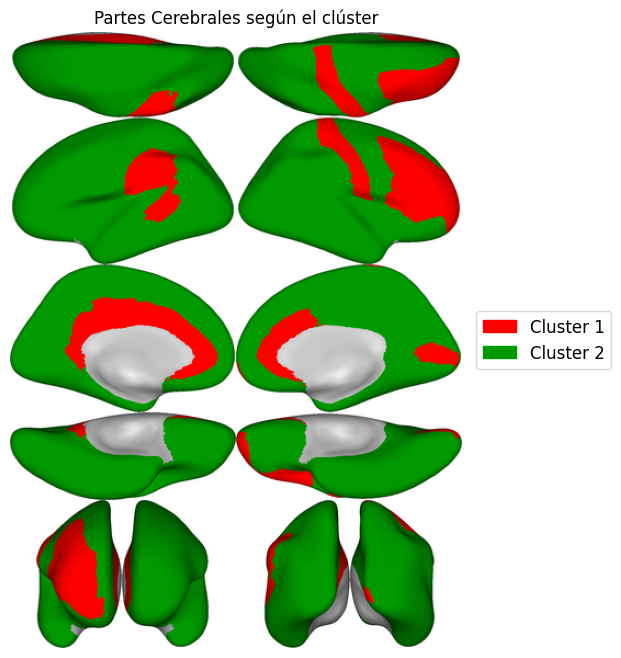

In [6]:
# Obtener IDs únicos de clúster
cluster_ids = sorted(df_mode["Cluster"].unique())

# Asignar colores fijos: Cluster 1 = rojo, Cluster 2 = verde, Cluster 3 = azul
color_map_dict = {
    1: (1.0, 0.0, 0.0),  # Rojo
    2: (0.0, 0.6, 0.0),  # Verde
    3: (0.0, 0.0, 1.0)   # Azul
}

# Crear lista de colores en orden de clúster, usando gris por defecto si hay más de 3
colors = [color_map_dict.get(c, (0.5, 0.5, 0.5)) for c in cluster_ids]
colormap = mcolors.ListedColormap(colors)

# Crear la imagen con la nueva paleta
img = create_montage_figure(roivals, atlasname='fs86',
                            viewnames='all', surftype='infl',
                            clim=[1, len(cluster_ids)], colormap=colormap, outputimagefile=None)

fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar la imagen
ax.imshow(img)
ax.axis('off')

# Crear la leyenda con colores asignados por clúster ID
legend_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {cluster_ids[i]}') for i in range(len(colors))]

# Agregar la leyenda dentro de la imagen
ax.legend(handles=legend_patches, loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=12, frameon=True)

# Agregar título
plt.title("Partes Cerebrales según el clúster", fontsize=12)

# Guardar la imagen con la leyenda incluida
output_file = "brain_APOE4.png"
plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Mostrar la imagen en pantalla también
plt.show()
